In [47]:
import os
import sys

sys.path.append(os.path.abspath(os.path.join('..'))) # imports top level

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import display
import scipy
from collections import defaultdict

import random

In [4]:
df = pd.read_excel("input.xlsx", sheet_name="test")

In [5]:
dis = display.Display(df=df)
dis.quick_processing()

The columns with prefix  are not in DataFrame
The columns with prefix None are not in DataFrame


In [6]:
df = dis.df

In [7]:
df

Name     pmar      p, %    p, beff     7-6_s     7-5_s     7-4_s  \
0          114  1.08357  7.774369   9.903655  0.648665  0.664725  1.083983   
1      114_7-6  1.07174  6.755688   8.605972  1.114553  0.746294  1.187454   
2   114_fake11  1.08923  8.368326  10.660287  0.641218  0.642833  1.041846   
3   114_fake12  1.10397  9.594128  12.221820  0.676469  1.019903  1.181528   
4   114_fake13  1.08883  8.334598  10.617323  0.618502  0.938442  0.643994   
5   114_fake14  1.08675  8.158817  10.393397  0.902233  1.009554  0.692320   
6   114_fake15  1.08575  8.074067  10.285435  0.928946  1.137616  0.711553   
7   114_fake16  1.08019  7.599994   9.681521  1.029842  1.292089  0.795778   
8        114_e  1.05418  5.157440   6.569987  0.662633  0.664318  1.114314   
9        126_e  1.04559       NaN        NaN  1.021445  1.166776  0.943520   
10       125_6  1.05420       NaN        NaN  1.103584  1.027178  1.001726   
11         127  1.08421  7.890446  10.051523  1.008279  1.086415  0.837248   
12       117_e  1.03976  3.991459   5.084662  0.637839  1.090268  0.978854   
13       120_e  1.04760  4.764019   6.068814  0.583573  1.076073  1.222231   

       7-3_s     6-6_s     6-5_s  ...  average_t  right_center_side_t  \
0   0.954085  0.795975  0.990852  ...     282.50                286.0   
1   1.001877  0.900434  1.090843  ...     282.50                286.0   
2   0.908672  0.806680  0.976815  ...     282.50                286.0   
3   0.942797  0.843354  0.994229  ...     282.50                286.0   
4   0.690662  0.810686  0.933036  ...     282.50                286.0   
5   0.729009  0.853579  0.991107  ...     282.50                286.0   
6   0.746304  0.868008  1.003537  ...     282.50                286.0   
7   1.357336  0.934161  1.087260  ...     282.50                286.0   
8   0.960230  0.817065  0.989906  ...     282.50                286.0   
9   0.888486  0.953183  0.807772  ...     284.25                286.0   
10  0.917414  1.038675  0.906340  ...     284.25                286.0   
11  0.759608  0.967771  0.790417  ...     284.25                286.0   
12  0.775210  0.760153  1.344501  ...     282.50                286.0   
13  0.922295  0.632962  1.191127  ...     282.50                286.0   

    left_center_side_t  right_side_t  left_side_t  center_t  qul_t  qur_t  \
0                279.0         286.0        272.0     286.0  279.0  286.0   
1                279.0         286.0        272.0     286.0  279.0  286.0   
2                279.0         286.0        272.0     286.0  279.0  286.0   
3                279.0         286.0        272.0     286.0  279.0  286.0   
4                279.0         286.0        272.0     286.0  279.0  286.0   
5                279.0         286.0        272.0     286.0  279.0  286.0   
6                279.0         286.0        272.0     286.0  279.0  286.0   
7                279.0         286.0        272.0     286.0  279.0  286.0   
8                279.0         286.0        272.0     286.0  279.0  286.0   
9                282.5         286.0        279.0     286.0  279.0  286.0   
10               282.5         286.0        279.0     286.0  279.0  286.0   
11               282.5         286.0        279.0     286.0  279.0  286.0   
12               279.0         286.0        272.0     286.0  279.0  286.0   
13               279.0         286.0        279.0     282.5  279.0  286.0   

    qll_t  qlr_t  
0   279.0  286.0  
1   279.0  286.0  
2   279.0  286.0  
3   279.0  286.0  
4   279.0  286.0  
5   279.0  286.0  
6   279.0  286.0  
7   279.0  286.0  
8   279.0  286.0  
9   286.0  286.0  
10  286.0  286.0  
11  286.0  286.0  
12  279.0  286.0  
13  279.0  286.0  

[14 rows x 157 columns]

In [8]:
[i for i in df.columns if "average" in i]

['average_s', 'average_l', 'average_p', 'average_b', 'average_t']

In [9]:
df["average_b"]

0      92.652975
1      92.652975
2      88.292025
3      79.625025
4      88.292025
5      88.292025
6      88.292025
7      88.292025
8     107.040150
9     101.580100
10     94.868850
11     85.192550
12    107.712925
13    104.726400
Name: average_b, dtype: float64

In [10]:
df_same_burn = df.iloc[4:]

In [11]:
df_same_burn["average_p"]

4     31.2400
5     31.2400
6     31.2400
7     31.2400
8     37.7475
9     35.9325
10    33.1955
11    30.1250
12    37.8695
13    37.5555
Name: average_p, dtype: float64

## Observe cells distibution after sampling

In [12]:
p_cols = dis.CORE_PARTS["percentage"]["ALL_CELLS"]
t_cols = dis.CORE_PARTS["fuel_type"]["ALL_CELLS"]

In [13]:
ancestor_0 = df.loc[11, :]

In [14]:
ancestor_0[p_cols] = [float("{:.2f}".format(i)) for i in ancestor_0[p_cols].to_numpy() ]

/tmp/ipykernel_24425/3079140421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ancestor_0[p_cols] = [float("{:.2f}".format(i)) for i in ancestor_0[p_cols].to_numpy() ]
/tmp/ipykernel_24425/3079140421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ancestor_0[p_cols] = [float("{:.2f}".format(i)) for i in ancestor_0[p_cols].to_numpy() ]


In [15]:
p_cols_booleans = ancestor_0.loc[t_cols] == 300
cols_8th = [
    j for i in p_cols_booleans[p_cols_booleans == True].index 
    for j in dis.CORE_PARTS["default"]["ALL_CELLS"]
    if j in i
]

In [16]:
p_cols_8th = [
    j for i in cols_8th
    for j in p_cols
    if i in j
]

In [34]:
all = ancestor_0[p_cols].to_numpy()
all_8tubes = ancestor_0[p_cols_8th].to_numpy()

In [36]:
sorter = np.argsort(all)
indexes_8tubes = sorter[np.searchsorted(all, all_8tubes, sorter=sorter)]

In [41]:
# some random chromosomes
random.seed(42)
population = []
for _ in range(100):
    population.append(
        np.array(random.sample(population=list(indexes_8tubes), k=len(p_cols_8th)))
    )
population = np.asarray(population)

<Axes: ylabel='Count'>

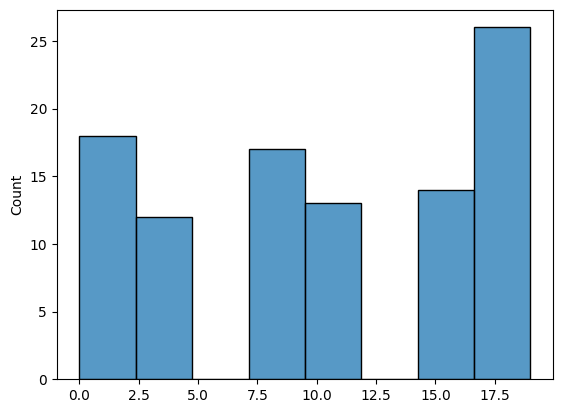

In [46]:
sns.histplot(population[:, 0])

In [20]:
# selection of 8th tubes cols / indexes
p1_8th = np.array(random.sample(population=ancestor_0[p_cols_8th].to_list(), k=len(p_cols_8th)))
p2_8th = np.array(random.sample(population=ancestor_0[p_cols_8th].to_list(), k=len(p_cols_8th)))

In [21]:
child1 = ancestor_0[p_cols].copy()
child2 = ancestor_0[p_cols].copy()

In [22]:
child1[p_cols_8th] = p1_8th
child2[p_cols_8th] = p2_8th

In [23]:
from model import Individual, GA, FITNESS_WEIGHTS_WINDOW, TARGET, Stacking, nonuniformity

In [24]:
weights = {
    "p_margin": 0.30, # use fuel burnup coef instead of this
    "k_fa_max": 0.10,
    "k_left_right": 0.20, # modify in order to estimate this symmetry more accurate 
    "k_sym": 0.40
}

In [25]:
ga = GA.no_fuel_mask(
    ancestor_0.loc[p_cols].to_numpy(), 
    ancestor_0.loc[t_cols].to_numpy(),
    population_size=50,
    mate_probability=0.6,
    permutation_mutation_probability=0.3,
    mutation_probabilty_fresh_fuel=0.4,
    fintess_weights=weights
)
indiv = Individual(
    fuel_map=ga.fuel_map,
    dynamic_fuels_gnome_ind=ga.dynamic_fuels_gnome_ind,
)

In [26]:
indiv.fitness_score(indiv, *TARGET)

1.0

In [27]:
ancestor_chromosome = indiv.initialize_chromosome(
    ancestor_0.loc[p_cols].to_numpy(), 
    0
)
ancestor_chromosome

{'id': 0,
 'fuels_gnome': array([13.23, 9.58, 41.41, 49.68, 33.2, 58.42, 26.37, 32.6, 0.0, 41.0,
        0.0, 40.28, 32.47, 23.94, 57.97, 31.17, 13.07, 41.01, 9.54, 47.56],
       dtype=object),
 'core_burnup': 30.1,
 'p_margin': 7.460479611964348,
 'k_fa_max': 1.3728192480813521,
 'k_fa_min': 0.7265691488430239,
 'k_left_right': 1.123693877834754,
 'k_sym': 0.9699162367755834,
 'fitness_score': 0.9130096463086086}

In [28]:
dis.display(ancestor_chromosome["fuels_gnome"])

# DO search

In [29]:
random.seed(42)
trained_population = ga.search(generations=100)
trained_population

start search with populations score: 0.6916736299344572and burnup 33.2
average populations score 0.7036039535310458 and burnup 32.89 at the end of 1 generation
average populations score 0.7139495220890687 and burnup 32.58 at the end of 2 generation
average populations score 0.7251502037424354 and burnup 32.332 at the end of 3 generation
average populations score 0.7334661773935022 and burnup 32.084 at the end of 4 generation
average populations score 0.7346494760194504 and burnup 31.836 at the end of 5 generation
average populations score 0.7403416261189184 and burnup 31.65 at the end of 6 generation
average populations score 0.7431458461146319 and burnup 31.588 at the end of 7 generation
average populations score 0.7465373975028566 and burnup 31.464000000000006 at the end of 8 generation
average populations score 0.7527738726065337 and burnup 31.402 at the end of 9 generation
average populations score 0.7572831815168855 and burnup 31.278000000000002 at the end of 10 generation
average

[{'id': 33,
  'fuels_gnome': array([3.44, 29.11, 39.56, 60.85, 24.1, 50.68, 14.3, 21.53, 51.85, 32.78,
         41.31, 32.45, 23.68, 12.88, 50.17, 20.39, 0.0, 3.48, 29.65, 60.46],
        dtype=object),
  'core_burnup': 30.1,
  'p_margin': 7.524743933591452,
  'k_fa_max': 1.2458439163075603,
  'k_fa_min': 0.6758606885969811,
  'k_left_right': 0.9919032100251178,
  'k_sym': 0.8299475652559645,
  'fitness_score': 0.8935580932538965},
 {'id': 23,
  'fuels_gnome': array([39.56, 32.78, 3.48, 29.11, 24.1, 50.68, 14.3, 21.53, 51.85, 60.46,
         3.44, 60.85, 23.68, 12.88, 50.17, 20.39, 41.31, 0.0, 32.45, 29.65],
        dtype=object),
  'core_burnup': 30.1,
  'p_margin': 7.248333238276357,
  'k_fa_max': 1.2859876311798533,
  'k_fa_min': 0.7846886835008935,
  'k_left_right': 0.9733295301671958,
  'k_sym': 0.8595265294150953,
  'fitness_score': 0.8889533695529133},
 {'id': 3,
  'fuels_gnome': array([3.44, 60.85, 32.45, 41.31, 24.1, 50.68, 14.3, 21.53, 51.85, 32.78,
         3.48, 29.11, 23.6

In [30]:
dis.display(trained_population[0]["fuels_gnome"])

In [31]:
dis.display(trained_population[-1]["fuels_gnome"])

In [32]:
res = Stacking.predict(
    indiv._fuels_gnome_refactorer(indiv, trained_population[0]["fuels_gnome"]),
    nonuniformity
)
res = res.iloc[0].to_numpy()
res

array([0.99871346, 0.91759792, 0.85060162, 0.67586069, 0.95915406,
       0.83507689, 1.24584392, 1.1385977 , 0.8348444 , 1.18846507,
       0.9266302 , 1.19131953, 1.00880079, 1.23498056, 0.91591861,
       1.153379  , 1.11764247, 1.14840552, 0.98364687, 0.71969391])

In [33]:
dis.display(res)

In [30]:
from joblib import load

In [36]:
gen_results = load("ga_weights_update/127_p_margin_vary2.joblib")

In [37]:
from main import refueling_pattern

In [38]:
gen_results

[{'p_margin': 0.3,
  'k_fa_max': 0.1,
  'k_left_right': 0.125,
  'k_sym': 0.475,
  'ga_results': [{'id': 28,
    'fuels_gnome': array([41.0, 9.54, 49.68, 13.23, 33.2, 58.42, 26.37, 32.6, 0.0, 41.01,
           9.58, 40.28, 32.47, 23.94, 57.97, 31.17, 41.41, 47.56, 13.07, 0.0],
          dtype=object),
    'core_burnup': 30.1,
    'p_margin': 7.249569050566053,
    'k_fa_max': 1.3047979912604037,
    'k_fa_min': 0.7614664929478533,
    'k_left_right': 0.9243626678929541,
    'k_sym': 0.977434045614957,
    'fitness_score': 0.9287751093609721},
   {'id': 48,
    'fuels_gnome': array([41.01, 13.07, 41.0, 13.23, 33.2, 58.42, 26.37, 32.6, 0.0, 49.68,
           9.54, 47.56, 32.47, 23.94, 57.97, 31.17, 40.28, 41.41, 9.58, 0.0],
          dtype=object),
    'core_burnup': 30.1,
    'p_margin': 7.077394459242479,
    'k_fa_max': 1.312319091400069,
    'k_fa_min': 0.773374270254342,
    'k_left_right': 0.9468665689086347,
    'k_sym': 0.9813196527944212,
    'fitness_score': 0.9270796759390011}

In [39]:
for res in gen_results:
    for core in res["ga_results"]:
        print(core["id"])
        cycles = refueling_pattern.find_pattern(
            ancestor_chromosome["fuels_gnome"],
            core["fuels_gnome"]   
        )
        pattern = refueling_pattern.decode_pattern(ancestor_chromosome["fuels_gnome"], cycles)
        core["permutations"] = pattern

28
spent fuel cells:  []
48
spent fuel cells:  []
[18, 10, 19, 11, 16, 1, 18]
spent fuel cells:  []
19
spent fuel cells:  []
[0, 1, 3, 9, 17, 2, 0]
spent fuel cells:  []
18
spent fuel cells:  []
3
spent fuel cells:  []
26
spent fuel cells:  []
[2, 19, 16, 2]
spent fuel cells:  []
6
spent fuel cells:  []
8
spent fuel cells:  []
25
spent fuel cells:  []
[2, 11, 1, 3, 2]
spent fuel cells:  []
46
spent fuel cells:  []
[18, 16, 10, 19, 17, 18]
spent fuel cells:  []
15
spent fuel cells:  []
14
spent fuel cells:  []
[18, 17, 18]
spent fuel cells:  []
[1, 10, 19, 0, 2, 9, 1]
spent fuel cells:  []
29
spent fuel cells:  []
[18, 17, 18]
spent fuel cells:  []
[3, 16, 3]
spent fuel cells:  []
43
spent fuel cells:  []
48
spent fuel cells:  []
42
spent fuel cells:  []
[17, 9, 11, 3, 0, 1, 17]
spent fuel cells:  []
[16, 2, 19, 16]
spent fuel cells:  []
4
spent fuel cells:  []
[0, 17, 11, 3, 9, 19, 0]
spent fuel cells:  []
[1, 18, 1]
spent fuel cells:  []
13
spent fuel cells:  []
21
spent fuel cells:  

In [55]:
dis.display(ancestor_chromosome["fuels_gnome"])

In [58]:
gen_results[0]["ga_results"].sort(key=lambda x: x["permutations"]["total permutations"])
print(gen_results[0]["ga_results"][0])
dis.display(gen_results[0]["ga_results"][0]["fuels_gnome"])

{'id': 28, 'fuels_gnome': array([41.0, 9.54, 49.68, 13.23, 33.2, 58.42, 26.37, 32.6, 0.0, 41.01,
       9.58, 40.28, 32.47, 23.94, 57.97, 31.17, 41.41, 47.56, 13.07, 0.0],
      dtype=object), 'core_burnup': 30.1, 'p_margin': 7.249569050566053, 'k_fa_max': 1.3047979912604037, 'k_fa_min': 0.7614664929478533, 'k_left_right': 0.9243626678929541, 'k_sym': 0.977434045614957, 'fitness_score': 0.9287751093609721, 'permutations': {0: ['FA 49.68 from cell 7-3 moves to a bucket', 'FA 13.23 from cell 7-6 moves to a cell 7-3', 'FA 41.0 from cell 5-3 moves to a cell 7-6', 'FA 41.01 from cell 2-5 moves to a cell 5-3', 'FA 47.56 from cell 2-3 moves to a cell 2-5', 'FA 0.0 from cell 4-6 moves to a cell 2-3', 'FA 9.58 from cell 7-5 moves to a cell 4-6', 'FA 9.54 from cell 2-4 moves to a cell 7-5', 'FA 13.07 from cell 2-6 moves to a cell 2-4', 'FA 41.41 from cell 7-4 moves to a cell 2-6', 'FA 49.68 from bucket places in a cell 7-4'], 'total permutations': 11}}


In [53]:
gen_results[1]["ga_results"].sort(key=lambda x: x["permutations"]["total permutations"])
gen_results[1]

{'p_margin': 0.25,
 'k_fa_max': 0.1,
 'k_left_right': 0.13,
 'k_sym': 0.52,
 'ga_results': [{'id': 25,
   'fuels_gnome': array([13.23, 40.28, 49.68, 9.58, 33.2, 58.42, 26.37, 32.6, 0.0, 41.0,
          9.54, 41.41, 32.47, 23.94, 57.97, 31.17, 13.07, 47.56, 41.01, 0.0],
         dtype=object),
   'core_burnup': 30.1,
   'p_margin': 6.912827564537952,
   'k_fa_max': 1.3183453460798247,
   'k_fa_min': 0.7673391666437683,
   'k_left_right': 0.978710476484539,
   'k_sym': 0.97767055824405,
   'fitness_score': 0.9338377627545102,
   'permutations': {0: ['FA 41.41 from cell 7-4 moves to a bucket',
     'FA 49.68 from cell 7-3 moves to a cell 7-4',
     'FA 9.58 from cell 7-5 moves to a cell 7-3',
     'FA 40.28 from cell 4-3 moves to a cell 7-5',
     'FA 41.41 from bucket places in a cell 4-3'],
    1: ['FA 0.0 from cell 4-6 moves to a bucket',
     'FA 9.54 from cell 2-4 moves to a cell 4-6',
     'FA 41.01 from cell 2-5 moves to a cell 2-4',
     'FA 47.56 from cell 2-3 moves to a cell 2-5

## Generate population

In [28]:
population = ga.make_population()

In [29]:
population

[{'id': 26,
  'fuels_gnome': array([42.8, 14.28, 57.33, 16.42, 38.23, 37.67, 11.55, 22.21, 51.15,
         56.55, 32.79, 40.88, 35.61, 10.12, 39.14, 20.31, 37.64, 0.0, 39.41,
         49.02], dtype=object),
  'core_burnup': 32.7,
  'p_margin': 6.191928317427417,
  'k_fa_max': 1.3449936547801935,
  'k_fa_min': 0.7435540293522419,
  'k_left_right': 0.9235634382773774,
  'fitness_score': 0.8261530814179161},
 {'id': 38,
  'fuels_gnome': array([0.0, 57.33, 32.79, 40.88, 38.23, 37.67, 11.55, 22.21, 51.15, 42.8,
         16.42, 39.41, 35.61, 10.12, 39.14, 20.31, 37.64, 14.28, 56.55,
         49.02], dtype=object),
  'core_burnup': 32.7,
  'p_margin': 5.942893050526707,
  'k_fa_max': 1.3514367481776726,
  'k_fa_min': 0.6850791257436335,
  'k_left_right': 0.9402008260157281,
  'fitness_score': 0.8186027839415847},
 {'id': 2,
  'fuels_gnome': array([57.33, 42.8, 16.42, 56.55, 38.23, 37.67, 11.55, 22.21, 51.15,
         40.88, 14.28, 49.02, 35.61, 10.12, 39.14, 20.31, 37.64, 39.41, 0.0,
        

In [30]:
dis.display(ancestor_chromosome["fuels_gnome"])

In [31]:
dis.display(population[0]["fuels_gnome"])

In [32]:
dis.display(population[20]["fuels_gnome"])

In [33]:
dis.display(population[-1]["fuels_gnome"])

## Do matting

In [34]:
offspring = ga.mate(
    population[10],
    population[11]
)
print(offspring)
dis.display(offspring["fuels_gnome"])

{'id': 0, 'fuels_gnome': array([16.42, 0.0, 56.55, 40.88, 38.23, 37.67, 11.55, 22.21, 51.15, 49.02,
       39.41, 32.79, 35.61, 10.12, 39.14, 20.31, 37.64, 42.8, 14.28,
       57.33], dtype=object), 'core_burnup': 32.7, 'p_margin': 5.580475777875024, 'k_fa_max': 1.388782624743694, 'k_fa_min': 0.6935795468935506, 'k_left_right': 0.899398013704116, 'fitness_score': 0.7810274174926545}


In [35]:
family = [
    offspring, 
    population[10].copy(),
    population[11].copy()
]
ga.mate_tournament_selection(family)

[{'id': 39,
  'fuels_gnome': array([39.41, 0.0, 49.02, 16.42, 38.23, 37.67, 11.55, 22.21, 51.15, 57.33,
         14.28, 40.88, 35.61, 10.12, 39.14, 20.31, 37.64, 56.55, 42.8,
         32.79], dtype=object),
  'core_burnup': 32.7,
  'p_margin': 5.673424248310043,
  'k_fa_max': 1.4107161813552216,
  'k_fa_min': 0.6400830554352792,
  'k_left_right': 0.8963078518615296,
  'fitness_score': 0.7816825103783311},
 {'id': 25,
  'fuels_gnome': array([16.42, 0.0, 56.55, 40.88, 38.23, 37.67, 11.55, 22.21, 51.15, 49.02,
         39.41, 32.79, 35.61, 10.12, 39.14, 20.31, 37.64, 42.8, 14.28,
         57.33], dtype=object),
  'core_burnup': 32.7,
  'p_margin': 5.580475777875024,
  'k_fa_max': 1.388782624743694,
  'k_fa_min': 0.6935795468935506,
  'k_left_right': 0.899398013704116,
  'fitness_score': 0.7810274174926545}]

## Do mutation

In [37]:
mutated_chromosome = ga.permutation_mutation(
    population[-1].copy()
)
mutated_chromosome, population[-1]

({'id': 35,
  'fuels_gnome': array([57.33, 14.28, 39.41, 16.42, 38.23, 37.67, 11.55, 22.21, 51.15, 0.0,
         40.88, 42.8, 35.61, 10.12, 39.14, 20.31, 37.64, 49.02, 56.55,
         32.79], dtype=object),
  'core_burnup': 32.7,
  'p_margin': 6.130688528473118,
  'k_fa_max': 1.7242877062109025,
  'k_fa_min': 0.6098921932908892,
  'k_left_right': 0.7407049253964052,
  'fitness_score': 0.7165680515142547},
 {'id': 35,
  'fuels_gnome': array([57.33, 56.55, 39.41, 16.42, 38.23, 37.67, 11.55, 22.21, 51.15, 0.0,
         40.88, 14.28, 35.61, 10.12, 39.14, 20.31, 37.64, 49.02, 42.8,
         32.79], dtype=object),
  'core_burnup': 32.7,
  'p_margin': 6.173923248554377,
  'k_fa_max': 1.72690529929065,
  'k_fa_min': 0.5533532720047417,
  'k_left_right': 0.658635276127472,
  'fitness_score': 0.6897768518527971})

#### Fresh Fuel Mutation probability rate

<Axes: >

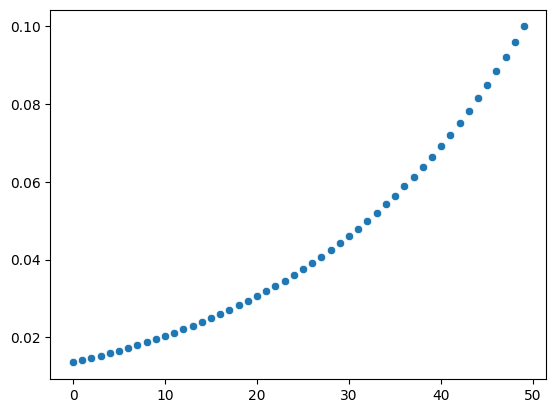

In [38]:
x_raw = np.linspace(28,40,50)
x = ( x_raw - x_raw.min() ) / ( x_raw.max() - x_raw.min() )
sns.scatterplot(np.exp(2*x) / np.exp(2*1) * 0.1)

#### Mutation probability rate

<Axes: >

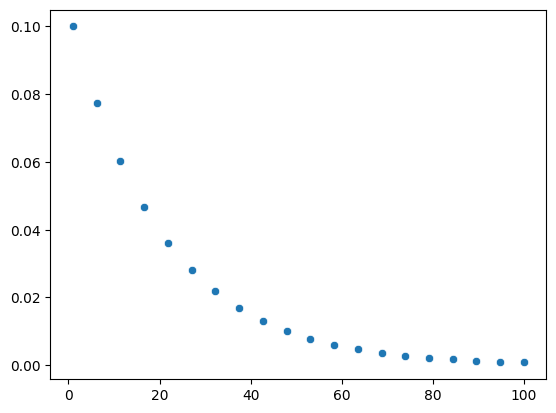

In [41]:
x = np.linspace(1,100,20)
sns.scatterplot(x=x, y=( (1 / np.power(1.05, x)) / ( 1 / np.power(1.05, 1)) ) * 0.1 )

In [88]:
np.asarray(list(map(lambda x: x["k_fa_max"], population))).mean()

1.4829589815728434

#### K burnup symmetry

In [35]:
x = np.linspace(0,70, 100)

<Axes: >

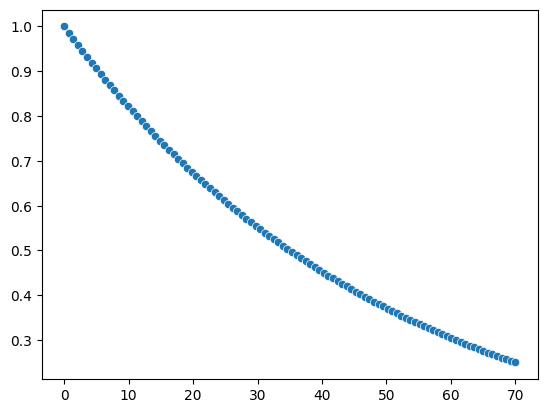

In [39]:
sns.scatterplot(x=x, y=np.power(1.02, 0) / np.power(1.02, x))

<Axes: >

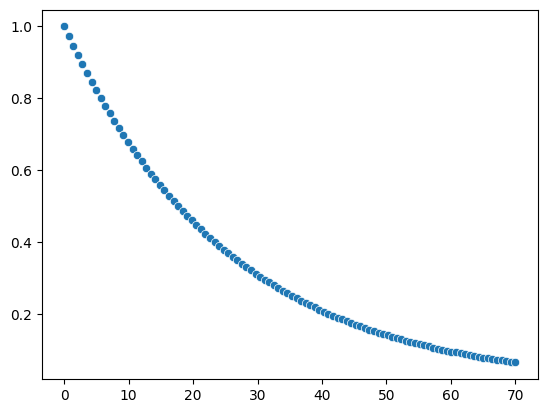

In [42]:
sns.scatterplot(x=x, y=np.power(1.04, 0) / np.power(1.04, x))

<Axes: >

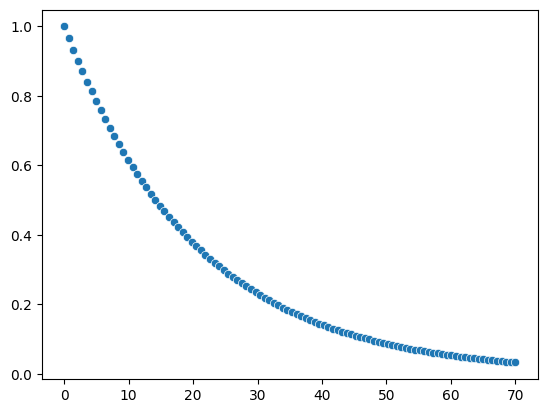

In [43]:
sns.scatterplot(x=x, y=np.power(1.05, 0) / np.power(1.05, x))